<a href="https://colab.research.google.com/github/fang37/a14-made-labs2/blob/master/Image_Data_Generator_Chessman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-O /tmp/Chessman-image-dataset.zip

--2020-09-17 16:48:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  5.47MB/s    in 15s     

2020-09-17 16:48:49 (3.91 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [2]:
# ekstrak dataset
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Pawn', 'Bishop', 'Queen', 'King', 'Knight']

In [4]:
# cek banyak data tiap direktori
print('total Pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total Pawn images : 107
total King images : 76
total Knight images : 106


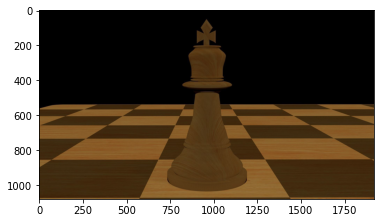

In [7]:
# melihat sample dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [9]:
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1) # set validation split

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, #directori sama dengan data train
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [13]:
# buat model arsitektur dengan 3 layer conv dan 2 hidden layer dengan 512 dan 256 perseptron
import tensorflow as tf
model = tf.keras.models.Sequential([
    # input shape yg diinginkan 150x150 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    #flatten the result to feed DNN
    tf.keras.layers.Flatten(),
    #512 neuron hideen layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # 1 output neuron value 0 atau 1
    tf.keras.layers.Dense(6, activation='softmax')
])

In [14]:
# tentukan oprimizer dan loss function
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 33s - loss: 1.8768 - accuracy: 0.1663 - val_loss: 1.7876 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 33s - loss: 1.7876 - accuracy: 0.1743 - val_loss: 1.7836 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 33s - loss: 1.7858 - accuracy: 0.1844 - val_loss: 1.7807 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 33s - loss: 1.7845 - accuracy: 0.1824 - val_loss: 1.7798 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 33s - loss: 1.7845 - accuracy: 0.1743 - val_loss: 1.7797 - val_accuracy: 0.1923
Epoch 6/50
63/63 - 33s - loss: 1.7835 - accuracy: 0.1623 - val_loss: 1.7800 - val_accuracy: 0.1923
Epoch 7/50
63/63 - 33s - loss: 1.7848 - accuracy: 0.1944 - val_loss: 1.7739 - val_accuracy: 0.2308
Epoch 8/50
63/63 - 33s - loss: 1.7838 - accuracy: 0.1764 - val_loss: 1.7751 - val_accuracy: 0.1731
Epoch 9/50
63/63 - 33s - loss: 1.7916 - accuracy: 0.2044 - val_loss: 1.7696 - val_accuracy: 0.2308
Epoch 10/50
63/63 - 33s - loss: 1.7807 - accuracy: 0.1984 - val_loss: 1.7804 - val_accuracy: 0.1923
Epoch 11/

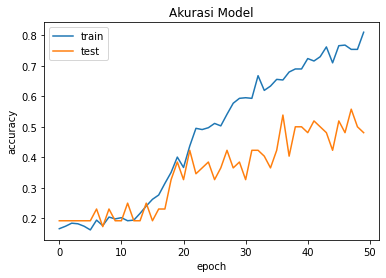

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()